In [1]:
# Create a gitignore becuase the dataset is too big. 

In [2]:
#categorical['GENDER'].value_counts(dropna=False)

In [3]:
#categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('learningSet.csv')

C:\Users\IUREK\AppData\Local\Temp\ipykernel_1096764\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [6]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [7]:
categorical = data.select_dtypes('object')

In [8]:
nulls_percent_df = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index() # with reset we get a coumn of column's name. 
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.985337
4,PVASTATE,0.984719
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [9]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
0,OSOURCE,0.009726
3,MAILCODE,0.985337
4,PVASTATE,0.984719
5,NOEXCH,0.000073
6,RECINHSE,0.929747
...,...,...
64,RFA_21,0.369052
65,RFA_22,0.268813
66,RFA_23,0.589800
67,RFA_24,0.387509


In [10]:
drop_list = []

In [11]:
drop_list = drop_list + ['OSOURCE', 'ZIP']

In [12]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.50]
print(len(columns_above_threshold['column_name']))

37


In [13]:
drop_list = drop_list + list(columns_above_threshold['column_name'])
print(drop_list)
len(drop_list)

['OSOURCE', 'ZIP', 'MAILCODE', 'PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_15', 'RFA_20', 'RFA_23']


39

#### Remove those columns from the dataframe

In [14]:
categorical = categorical.drop(columns=drop_list)
categorical.shape

(95412, 35)

#### Perform all of the cleaning processes from the Lesson.

In [15]:
categorical.isna().sum()/len(categorical)

STATE       0.000000
NOEXCH      0.000073
MDMAUD      0.000000
DOMAIN      0.024274
CLUSTER     0.024274
AGEFLAG     0.309689
HOMEOWNR    0.232969
GENDER      0.030992
DATASRCE    0.223033
RFA_2       0.000000
RFA_3       0.020438
RFA_4       0.024232
RFA_5       0.352052
RFA_6       0.037280
RFA_7       0.093007
RFA_8       0.036798
RFA_9       0.117857
RFA_10      0.343227
RFA_11      0.109232
RFA_12      0.093521
RFA_13      0.421530
RFA_14      0.197742
RFA_16      0.213988
RFA_17      0.289796
RFA_18      0.222855
RFA_19      0.256697
RFA_21      0.369052
RFA_22      0.268813
RFA_24      0.387509
RFA_2R      0.000000
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.003343
dtype: float64

In [16]:
pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

,index,STATE
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
5,NC,4160
6,WA,3577
7,GA,3403
8,IN,2980
9,WI,2795


In [17]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
#other_states
def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [18]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [19]:
categorical['DOMAIN'].value_counts(dropna=False)

R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, dtype: int64

In [20]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [21]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [22]:
categorical.DOMAIN_A.value_counts()

R    22106
S    21924
C    19689
T    19527
U    12166
Name: DOMAIN_A, dtype: int64

In [23]:
drop_list = []

In [24]:
categorical['NOEXCH'].value_counts()

0    61203
0    33882
1      195
1       90
X       35
Name: NOEXCH, dtype: int64

In [25]:
drop_list.append('NOEXCH')

In [26]:
print(categorical['MDMAUD'].value_counts())

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64


In [27]:
drop_list.append('MDMAUD')

In [28]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [29]:
categorical['CLUSTER'].value_counts(dropna=False)

40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: CLUSTER, dtype: int64

In [30]:
sorted(categorical['CLUSTER'].value_counts().index)

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '6',
 '7',
 '8',
 '9']

In [31]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [32]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [33]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U')

In [34]:
categorical['GENDER'].value_counts(dropna=False)

F      51277
M      39094
NaN     2957
U       1715
J        365
C          2
A          2
Name: GENDER, dtype: int64

In [35]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [36]:
df = pd.DataFrame(categorical['GENDER'].value_counts()).reset_index()

df.columns = ['gender', 'count']
other_states = list(df[df['count']<2000]['gender'])

def clean_gender(x):
    if x in other_gender:
        return 'other'
    else:
        return x
    
categorical['GENDER'] = list(map(clean_state, categorical['GENDER']))

In [37]:
categorical['GENDER'].value_counts(dropna=False)

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [38]:
categorical['DATASRCE'].value_counts(dropna=False)

3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64

In [39]:
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('Not matched')

In [40]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [41]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [42]:
for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)

In [43]:
categorical = categorical.drop(columns=drop_list)
categorical

,STATE,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,T2,36,NaN,U,F,Not matched,C,T,2
1,CA,S1,14,E,H,M,3,A,S,1
2,NC,R2,43,NaN,U,M,3,C,R,2
3,CA,R2,44,E,U,F,3,C,R,2
4,FL,S2,16,E,H,F,3,A,S,2
...,...,...,...,...,...,...,...,...,...,...
95407,other,C2,27,NaN,U,M,Not matched,C,C,2
95408,TX,C1,24,E,H,M,3,A,C,1
95409,MI,C3,30,NaN,U,M,Not matched,B,C,3
95410,CA,C1,24,E,H,F,2,A,C,1


In [44]:
categorical

,STATE,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,T2,36,NaN,U,F,Not matched,C,T,2
1,CA,S1,14,E,H,M,3,A,S,1
2,NC,R2,43,NaN,U,M,3,C,R,2
3,CA,R2,44,E,U,F,3,C,R,2
4,FL,S2,16,E,H,F,3,A,S,2
...,...,...,...,...,...,...,...,...,...,...
95407,other,C2,27,NaN,U,M,Not matched,C,C,2
95408,TX,C1,24,E,H,M,3,A,C,1
95409,MI,C3,30,NaN,U,M,Not matched,B,C,3
95410,CA,C1,24,E,H,F,2,A,C,1


In [45]:
categorical.to_csv('categoricalw7.csv', index=False)

### Feature engineering

#### Check for null values in the numerical columns.

In [46]:
numerical = data.select_dtypes(np.number)

In [47]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [48]:
numerical.shape

(95412, 407)

In [49]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
6,WEALTH1,44732
8,MBCRAFT,52854
...,...,...
386,RAMNT_23,87553
387,RAMNT_24,77674
398,NEXTDATE,9973
399,TIMELAG,9973


In [51]:
# numerical["GEOCODE2"].dtypes #Geocode it is not a numercial

In [ ]:
#numerical.INCOME = np.where(numerical['INCOME']=='5.0', 5.0, numerical['INCOME'])

### NUMERICAL COLUMNS LAB | Feature engineering

In [ ]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

In [ ]:
#Replacing the empty values with NaN values
numerical.replace(' ', np.nan, inplace=True)

In [52]:
numerical.isna().sum()/len(numerical)

ODATEDW     0.000000
TCODE       0.000000
DOB         0.000000
AGE         0.248030
NUMCHLD     0.870184
              ...   
TARGET_B    0.000000
TARGET_D    0.000000
HPHONE_D    0.000000
RFA_2F      0.000000
CLUSTER2    0.001383
Length: 407, dtype: float64

In [53]:
numerical_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
numerical_df
numerical_df.columns = ['column_name', 'nulls_percentage']
numerical_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [54]:
#Checking which columns have NaN more than 50%
columns_above_threshold1 = numerical_df[numerical_df['nulls_percentage']>0.50]
columns_above_threshold1['column_name']

4       NUMCHLD
8       MBCRAFT
9      MBGARDEN
10      MBBOOKS
11     MBCOLECT
         ...   
383    RAMNT_20
384    RAMNT_21
385    RAMNT_22
386    RAMNT_23
387    RAMNT_24
Name: column_name, Length: 62, dtype: object

In [55]:
columns_above_threshold1.shape

(62, 2)

In [56]:
drop_columns_list1 = list(columns_above_threshold1['column_name'])
print(drop_columns_list1)

['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_15', 'ADATE_20', 'ADATE_23', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [57]:
numerical = numerical.drop(drop_columns_list1, axis= 1)
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0,23,14,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1,28,9,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,0,14,36,47,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,7.0,9.0,1,0,31,43,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,0,0,18,46,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,7.0,NaN,0,0,28,35,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [58]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_5,33590


In [59]:
drop_list=[]
for col in numerical.columns:
    if 'ADATE' in col:
        drop_list.append(col)

In [60]:
numerical = numerical.drop(drop_list, axis= 1)
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0,23,14,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1,28,9,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,0,14,36,47,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,7.0,9.0,1,0,31,43,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,0,0,18,46,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,7.0,NaN,0,0,28,35,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [61]:
numerical['AGE'].value_counts(dropna=False)

NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: AGE, Length: 97, dtype: int64

C:\Users\IUREK\AppData\Local\Temp\ipykernel_1096764\2178262592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['AGE'])


NameError: name 'plt' is not defined

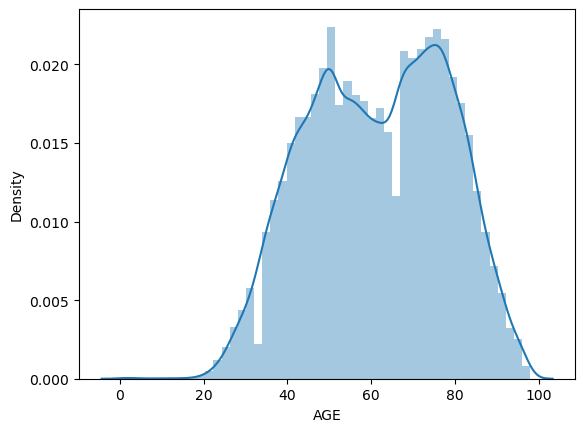

In [63]:
import seaborn as sns 
sns.distplot(numerical['AGE'])
plt.show()

In [64]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))

C:\Users\IUREK\AppData\Local\Temp\ipykernel_1096764\458945194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['INCOME'])


NameError: name 'plt' is not defined

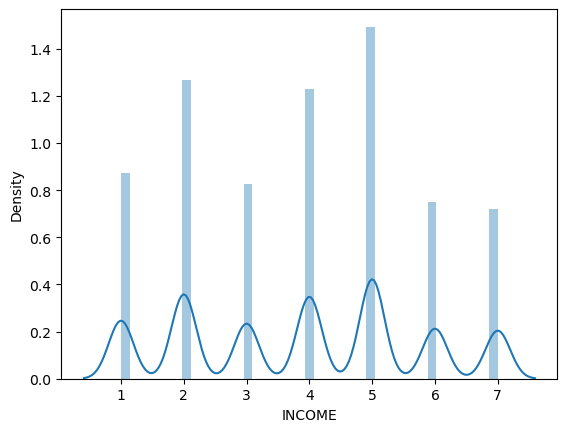

In [65]:
sns.distplot(numerical['INCOME']) 
plt.show()

In [66]:
print(numerical['INCOME'].value_counts(dropna=False))

NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64


In [67]:
numerical['INCOME'] = numerical['INCOME'].fillna(5.0)

C:\Users\IUREK\AppData\Local\Temp\ipykernel_1096764\2601548513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2'])


NameError: name 'plt' is not defined

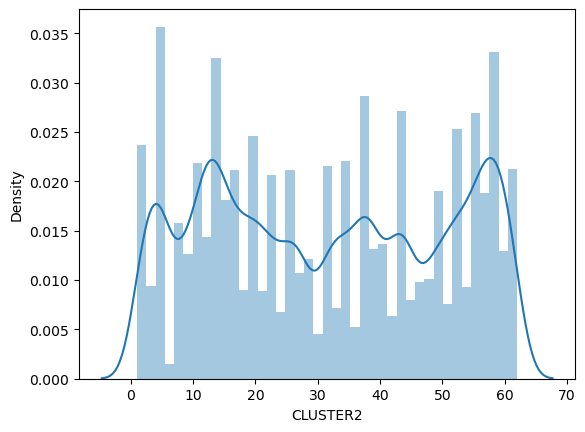

In [68]:
sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [69]:
numerical['CLUSTER2'].value_counts()

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

In [70]:
np.mean(numerical['CLUSTER2'])

31.533711167086484

In [71]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [72]:
np.mean(numerical['ADI'])

187.35640218303945

In [73]:
numerical['ADI'] = numerical['ADI'].fillna(np.ceil(np.mean(numerical['ADI'])))

In [75]:
np.mean(numerical['MSA'])

3527.744101595298

In [76]:
numerical['MSA'] = numerical['MSA'].fillna(np.ceil(np.mean(numerical['MSA'])))

In [77]:
np.mean(numerical['DMA'])

In [78]:
numerical['DMA'] = numerical['DMA'].fillna(np.ceil(np.mean(numerical['DMA'])))

In [79]:
numerical.WEALTH2.value_counts(dropna=False)

In [81]:
sns.distplot(numerical[numerical['WEALTH2'].isna()==False]['WEALTH2']) 
plt.show()

In [82]:
numerical['WEALTH2'] = numerical['WEALTH2'].fillna(5.0) 

In [83]:
numerical.TIMELAG.value_counts(dropna=False)

In [84]:
numerical['TIMELAG'].median()

In [85]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(6) 

In [86]:
numerical.ADI.value_counts(dropna=False)

In [87]:
numerical.WEALTH1.value_counts(dropna=False)

In [88]:
numerical['WEALTH1'] = numerical["WEALTH1"].fillna(np.mean(numerical['WEALTH1']))

In [89]:
numerical.NEXTDATE.value_counts(dropna=False)

In [91]:
numerical['NEXTDATE']

In [92]:
numerical.NEXDATE = np.where((numerical.FISTDATE==numerical.LASTDAY), 0, numericals.NEXTIME)
# Why? NaN values from NEXTDATE mean donors did not receive any 2º gift.
# We can check that if the FISTDATE and the LASTDATE are the same.

In [93]:
numerical[["FISTDATE", "TIMELAG", "NEXTDATE", "LASTDATE"]].head(12)

In [ ]:
numerical.to_csv('numerricalw7.csv', index=False)